# Regression with Neural Network

Here we use insurance.csv dataset to predict charges using other parameters(age, sex bmi, children, smoker, region)

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Collecting Dataset

In [2]:
insurance = pd.read_csv('datasets/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [6]:
# Create X & y values
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [7]:
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Fit the column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [10]:
# Transform training and test data with normalization (MinMaxScaler, OneHotEncoder)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [33]:
X_train[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [34]:
X_train_normal.shape

(1070, 11)

## Training Models

### Model 1

In [11]:
# Build a neural network 

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13325.8740 - mae: 13325.8740
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11604.6357 - mae: 11604.6357
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9815.3809 - mae: 9815.3809
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8611.2617 - mae: 8611.2617
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8165.9160 - 

34/34 [==============================] - 0s 2ms/step - loss: 3485.0234 - mae: 3485.0234
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 3486.6609 - mae: 3486.6609
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 3495.8218 - mae: 3495.8218
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 3480.0283 - mae: 3480.0283
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 3485.9912 - mae: 3485.9912
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 3483.8472 - mae: 3483.8472
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 3488.1558 - mae: 3488.1558
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3495.9912 - mae: 3495.9912
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.3540 - mae: 3488.3540
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3494.0823 - mae: 3494.0823
Epo

In [15]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3170.0488 - mae: 3170.0488


[3170.048828125, 3170.048828125]

In [16]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Here, the mean absolute error = 3170.

### Model 2
Now, let's try to reduce error by adding more layers and using Adam optimizer

In [17]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

34/34 [==============================] - 0s 2ms/step - loss: 3676.9766 - mae: 3676.9766
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 3673.9492 - mae: 3673.9492
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3667.8455 - mae: 3667.8455
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3664.5759 - mae: 3664.5759
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3660.3044 - mae: 3660.3044
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3655.2202 - mae: 3655.2202
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3653.8833 - mae: 3653.8833
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3652.0193 - mae: 3652.0193
Epo

In [18]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Here, the error has increased than before

### Model 3
Increase the epochs

In [36]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13325.8740 - mae: 13325.8740
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 11604.6357 - mae: 11604.6357
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 9815.3809 - mae: 9815.3809
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8611.2617 - mae: 8611.2617
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8165.9160 - 

34/34 [==============================] - 0s 2ms/step - loss: 3486.6609 - mae: 3486.6609
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 3495.8218 - mae: 3495.8218
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 3480.0283 - mae: 3480.0283
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 3485.9912 - mae: 3485.9912
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 3483.8472 - mae: 3483.8472
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 3488.1558 - mae: 3488.1558
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 3495.9912 - mae: 3495.9912
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 3488.3540 - mae: 3488.3540
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 3494.0823 - mae: 3494.0823
Epoch 91/200
34/34 [==============================] - 0s 1ms/step - loss: 3489.1560 - mae: 3489.1560
Epo

34/34 [==============================] - 0s 1ms/step - loss: 3491.6328 - mae: 3491.6328
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 3492.1711 - mae: 3492.1711
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3490.9890 - mae: 3490.9890
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 3489.7913 - mae: 3489.7913
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3487.2278 - mae: 3487.2278
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 3486.5061 - mae: 3486.5061
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 3487.0515 - mae: 3487.0515
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3483.3953 - mae: 3483.3953
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 3490.6089 - mae: 3490.6089
Epoch 171/200
34/34 [==============================] - 0s 1ms/step - loss: 3486.6152 - mae: 3486

In [37]:
# Evaluate model 3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.9829 - mae: 3161.9829


[3161.98291015625, 3161.98291015625]

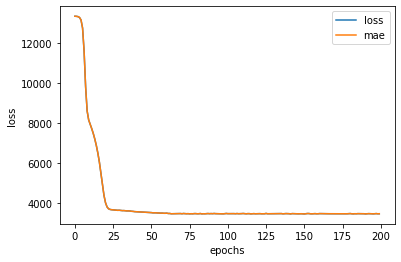

In [38]:
# Plot history 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

Here error is bit lower than model 1

### Model 4

In [60]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=50, verbose=0)

In [61]:
# Evaluate model 4
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 996us/step - loss: 3163.2454 - mae: 3163.2454


[3163.245361328125, 3163.245361328125]

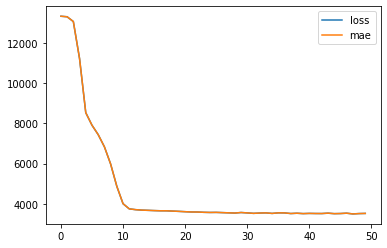

In [62]:
pd.DataFrame(history.history).plot()